In [15]:

import torch
from torch import nn
from torchinfo import summary

from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import lightning as L
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import torch.optim as optim

from tqdm.auto import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy  as np
import tracemalloc 

import json
import os
import glob
import pickle
from itertools import combinations
import gc
import time
import random
import sys

sys.path.insert(0, os.path.join(os.path.abspath(''), ".."))
from model.builder import Classifier1DMaxPoolBNModel
from datamodule.datamodule import DataModule
from utils.TSNE import get_tsne, scatter_tsne
from utils.FFT import stft

import warnings
warnings.filterwarnings("ignore")


In [2]:
L.seed_everything(42)


Seed set to 42


42

In [4]:
data_module = DataModule(test_user=0, 
    missing_sensor_numbers=0,
    batch_size=512)


In [5]:
data_module.setup("fit")
train_data, train_label = data_module.train_data, data_module.train_label

print("train_data.shape, train_label.shape", train_data.shape, train_label.shape)

train_data.shape, train_label.shape (5088, 42, 256) (5088,)


In [6]:
data_module.setup("test")
test_data, test_label = data_module.test_data, data_module.test_label

print("test_data.shape, test_label.shape", test_data.shape, test_label.shape)

test_data.shape, test_label.shape (214, 42, 256) (214,)


<Axes: >

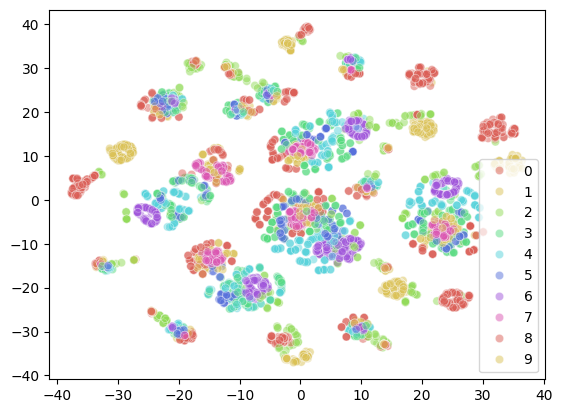

In [22]:
_, tsne_result = get_tsne(train_data.reshape(train_data.shape[0], -1))
scatter_tsne(tsne_result, label=train_label)

In [21]:
all_channel_data = []
for channel in range(train_data.shape[1]):
    one_channel_data = train_data[:,channel,:]
    _, one_channel_fft = stft(one_channel_data)
    # print(one_channel_fft.shape)
    all_channel_data.append(one_channel_fft.T)
    
all_channel_data_concat = np.stack(all_channel_data).transpose(1,0,2)
print(all_channel_data_concat.shape)
    

(5088, 42, 129)


<Axes: >

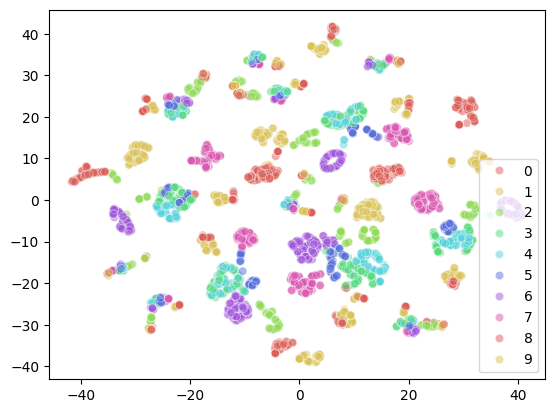

In [23]:
_, tsne_result = get_tsne(all_channel_data_concat.reshape(all_channel_data_concat.shape[0], -1))
scatter_tsne(tsne_result, label=train_label)